## Imports

In [1]:
!pandoc

'pandoc' is not recognized as an internal or external command,
operable program or batch file.


In [89]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization,Activation
from keras.layers import Conv2D, MaxPooling2D

from keras.optimizers import Adam

from keras.callbacks import EarlyStopping

## House-keeping parameters

In [2]:
batch_size = 128
num_classes = 10
epochs = 100

## Load Dataset

In [50]:
(x1,y1),(x2,y2) = mnist.load_data()

We need to convert the images to float32 and scale the inputs. We also convert predictions from numeric to one-hot encoding

In [51]:
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)

# Reshape to have explicit channel
x1 = x1.reshape(x1.shape[0], 28, 28, 1)
x2 = x2.reshape(x2.shape[0], 28, 28, 1)

# One hot
y1 = keras.utils.to_categorical(y1,num_classes)
y2 = keras.utils.to_categorical(y2,num_classes)

Check to verify input

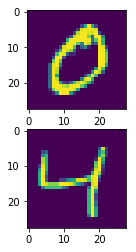

In [148]:
plt.figure()
plt.subplot(2,1,1)
plt.imshow(x1[1,:,:,0])
plt.subplot(2,1,2)
plt.imshow(x1[2,:,:,0])

## Setup Model

Input shape will be width * height * channels

In [86]:
input_shape = (28,28, 1)

Model consists of two Convlutional layers and two Dense. Batch Normalization is used in every layer.

In [134]:
input_layer = Input(shape = input_shape)

conv1 = Conv2D(36, kernel_size=(5,5))(input_layer)
conv1 = BatchNormalization()(conv1)
conv1_a = Activation(activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1_a)

conv2 =Conv2D(64, kernel_size=(5,5))(pool1)
conv2 = BatchNormalization()(conv2)
conv2_a = Activation(activation='relu')(conv2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2_a)

flatten = Flatten()(pool2)
dense1 = Dense(128)(flatten)
dense1 = BatchNormalization()(dense1)
dense1_a = Activation(activation='relu')(dense1)

dense2 = Dense(num_classes)(dense1_a)
dense2 = BatchNormalization()(dense2)
dense2_a = Activation(activation='softmax')(dense2)

# The propper model
model = Model(inputs=input_layer, output=dense2_a)

# Way to visualize internal layers
vis1 = Model(inputs=input_layer, output=conv1_a)
vis2 = Model(inputs=input_layer, output=conv2_a)

vis3 = Model(inputs = input_layer, output=dense1_a)
vis4 = Model(inputs = input_layer, output=dense2_a)

vis5 = Model(inputs = input_layer, output=flatten)

c:\users\sciion.sciion\.virtualenvs\kerastest-ry9gpszk\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
c:\users\sciion.sciion\.virtualenvs\kerastest-ry9gpszk\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
c:\users\sciion.sciion\.virtualenvs\kerastest-ry9gpszk\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`


We use one-hot encoding so categorical_crossentropy is the propper loss function. Adam is used with default parameters.

In [135]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [136]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 36)        936       
_________________________________________________________________
batch_normalization_37 (Batc (None, 24, 24, 36)        144       
_________________________________________________________________
activation_37 (Activation)   (None, 24, 24, 36)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 36)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          57664     
_________________________________________________________________
batch_normalization_38 (Batc (None, 8, 8, 64)          256       
__________

## Training

In [137]:
model.fit(x1,y1,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x2,y2),
          callbacks=[EarlyStopping(monitor='val_loss',patience=4)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.6461 - acc: 0.9113 - val_loss: 0.4124 - val_acc: 0.9728
Epoch 2/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.4144 - acc: 0.9740 - val_loss: 0.3537 - val_acc: 0.9809
Epoch 3/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.3504 - acc: 0.9810 - val_loss: 0.3264 - val_acc: 0.9848
Epoch 4/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.3055 - acc: 0.9853 - val_loss: 0.2693 - val_acc: 0.9884
Epoch 5/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2698 - acc: 0.9881 - val_loss: 0.2508 - val_acc: 0.9900
Epoch 6/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2421 - acc: 0.9900 - val_loss: 0.2105 - val_acc: 0.9907
Epoch 7/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.2176 - acc: 0.9916 - val_loss: 0.1908 -

## Testing

In [138]:
score = model.evaluate(x2, y2, verbose=0)

In [151]:
print("Validation Loss: ", score[0])
print("Accuracy: ", score[1])

Validation Loss:  0.02608542731553316
Accuracy:  0.9939


## Inspection

Here we inspect some internal layers in order to find potential strange behaviour like constant outputs or noise.

In [140]:
for i in range(0,32):
    p = model.predict(np.array([x2[i,...]], dtype='float32'))
    print(np.argmax(p), np.argmax(y2[i]))

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4
9 9
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1
3 3
1 1


In [194]:
p1 = vis1.predict(np.array([x2[0,...]], dtype='float32'))
p2 = vis2.predict(np.array([x2[0,...]], dtype='float32'))

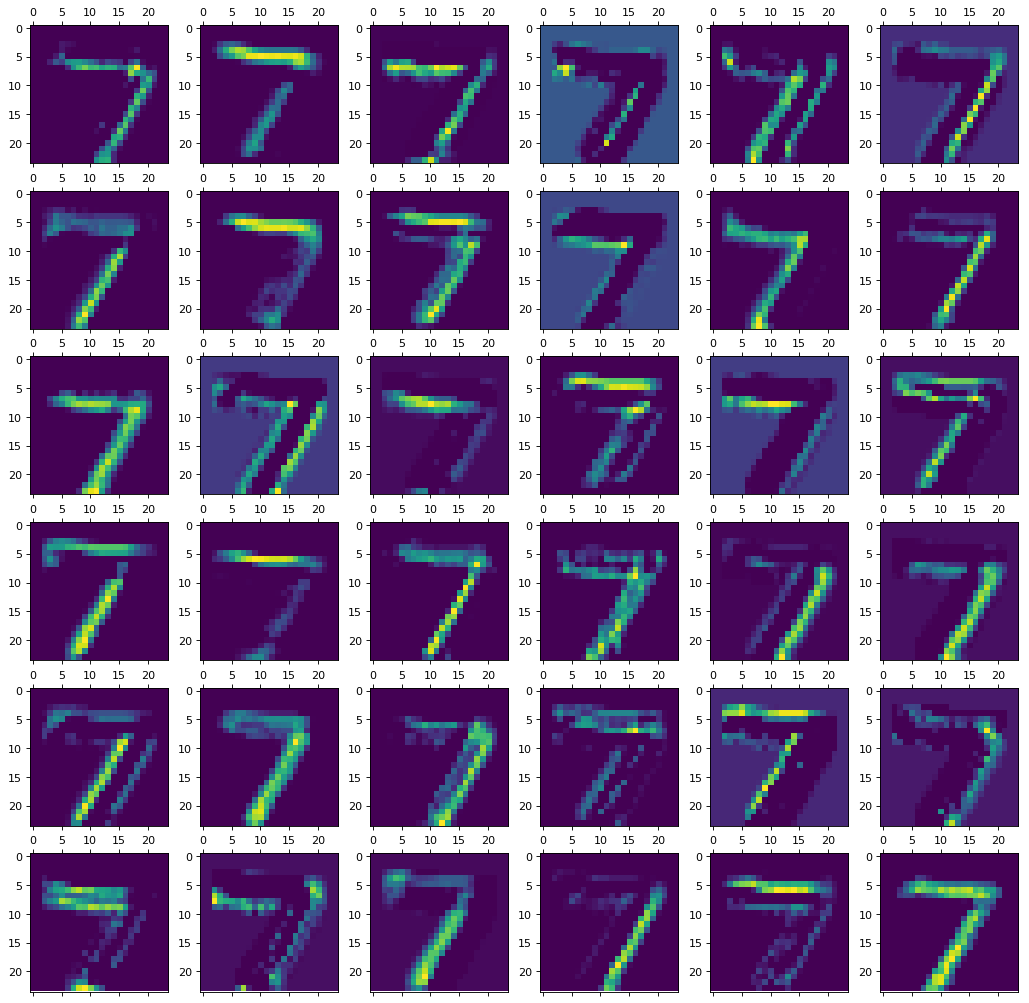

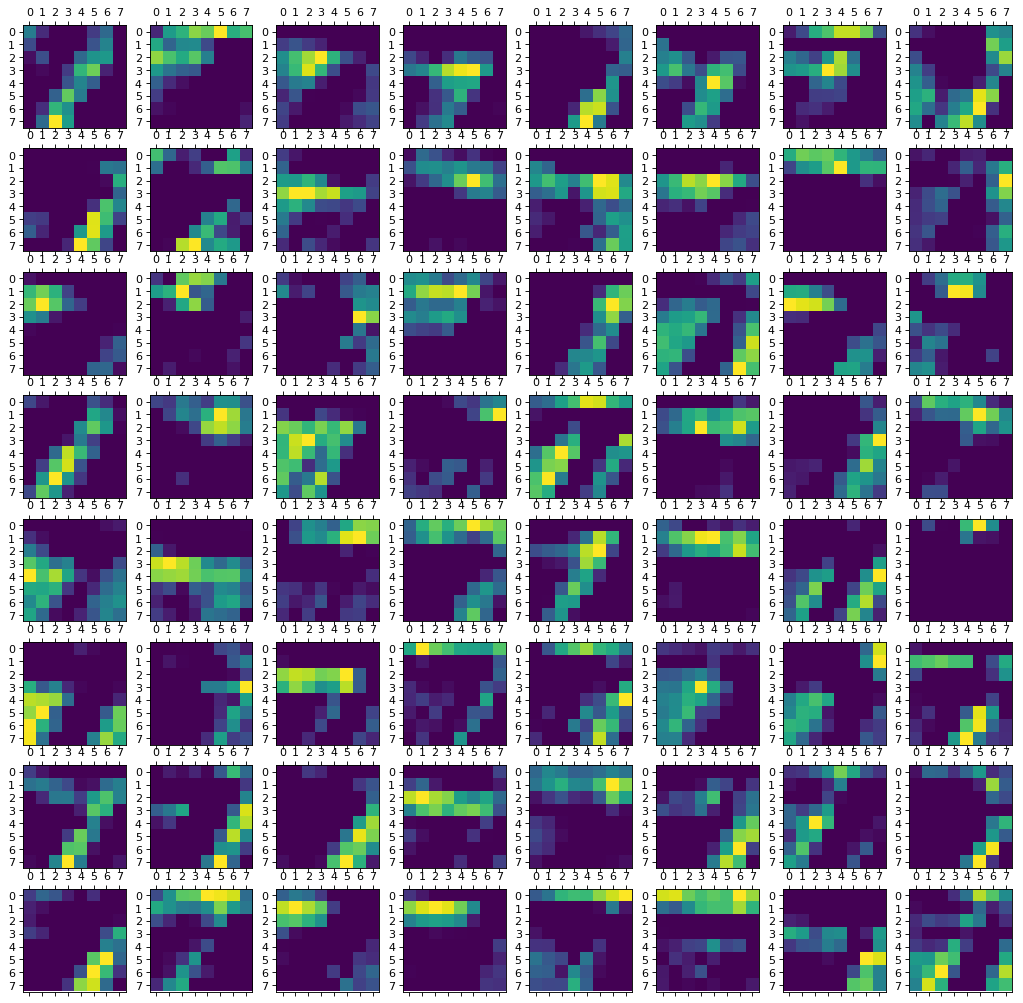

In [188]:
%matplotlib inline

plt.figure(figsize=(16, 16), dpi=80)
plt.tight_layout()
for i in range(p1.shape[3]):
    plt.subplot(6,6,i+1)
    plt.matshow(p1[0,:,:,i], fignum=False)
    
plt.figure(figsize=(16, 16), dpi=80)
plt.tight_layout()
for i in range(p2.shape[3]):
    plt.subplot(8,8,i+1)
    plt.matshow(p2[0,:,:,i], fignum=False)
    

In [189]:
p3m = np.zeros((64,128))
p4m = np.zeros((64,10))
p5m = np.zeros((64,1024))
for i in range(0,64):
    p3m[i] = vis3.predict(np.array([x2[i,...]], dtype='float32'))
    p4m[i] = vis4.predict(np.array([x2[i,...]], dtype='float32'))
    p5m[i] = vis5.predict(np.array([x2[i,...]], dtype='float32'))

Each row is the output for a given sample

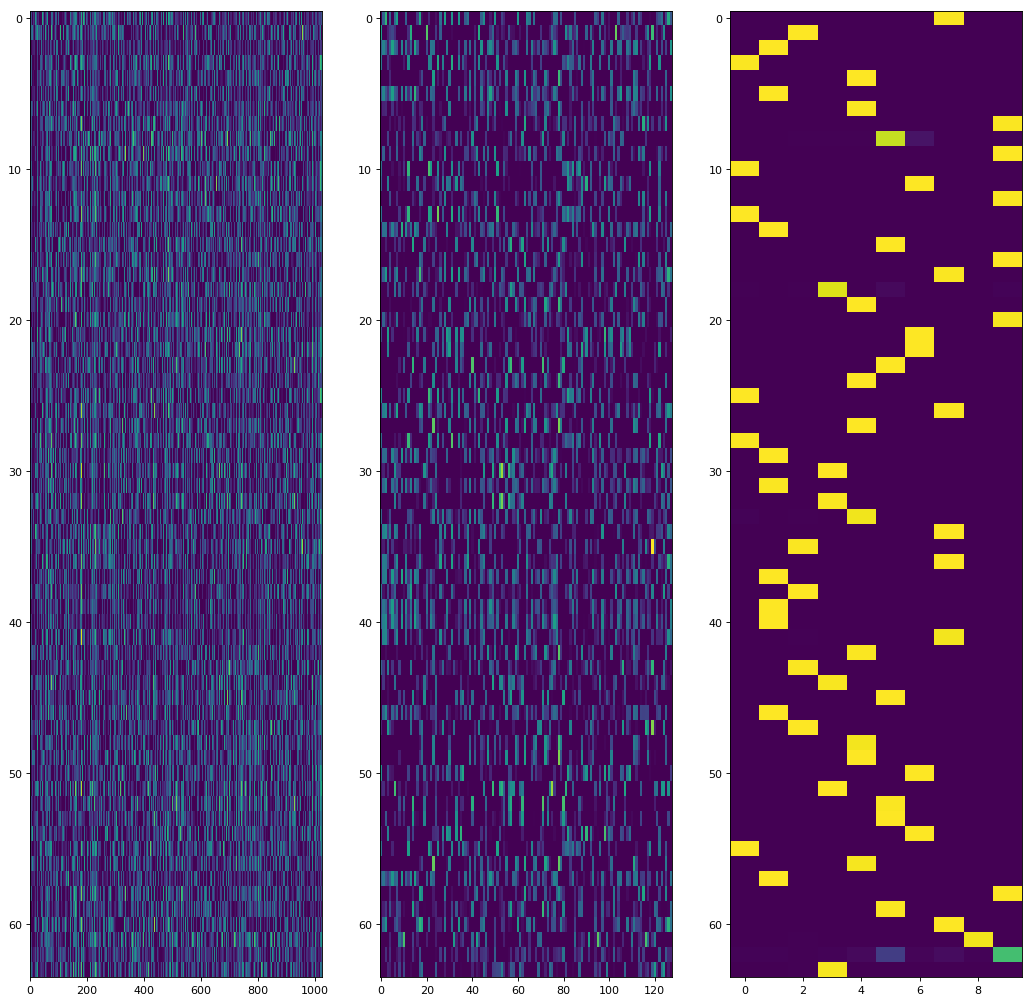

In [212]:
plt.figure(figsize=(16, 16), dpi=80)
plt.tight_layout()

plt.subplot(131)
plt.imshow(p5m, aspect="auto")

plt.subplot(132)
plt.imshow(p3m,aspect="auto")

plt.subplot(133)
plt.imshow(p4m, aspect="auto")
